In [26]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

import os


In [3]:
zip_path = r"C:\Users\USER\Desktop\ML_Projects\archive (3).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    #zip_ref.extractall("Datasets")


File Name                                             Modified             Size
power-quality-meter.csv                        2020-06-08 18:47:54       313061


In [4]:
with zipfile.ZipFile(zip_path) as z:
    with z.open('power-quality-meter.csv') as f:
        meter = pd.read_csv(f,sep = ",")


In [5]:
meter.head(10)

,Unnamed: 0,Date,Time,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
0,0,2019-08-31,3:21:43 PM.135,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98
1,1,2019-08-31,3:22:13 PM.135,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00
2,2,2019-08-31,3:22:43 PM.135,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00
3,3,2019-08-31,3:23:13 PM.135,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00
4,4,2019-08-31,3:23:43 PM.135,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00
5,5,2019-08-31,3:24:13 PM.135,242.58,241.62,242.22,0.54,656.8,595.0,546.1,-1.78,-130.56,-242.66,431250,436500,37200,1.00,0.98,1.00,1.00
6,6,2019-08-31,3:24:43 PM.135,242.40,241.38,242.08,0.54,659.5,588.8,542.2,-1.72,-130.54,-242.20,429150,434550,35850,1.00,0.98,1.00,1.00
7,7,2019-08-31,3:25:13 PM.135,242.28,241.18,241.98,0.54,652.2,575.6,532.5,-1.30,-130.02,-241.40,421800,427200,31050,1.00,0.98,1.00,1.00
8,8,2019-08-31,3:25:43 PM.135,242.54,241.28,242.18,0.54,648.3,574.9,531.1,-1.04,-129.90,-241.14,420750,426000,29400,1.00,0.99,1.00,1.00
9,9,2019-08-31,3:26:13 PM.135,242.56,241.64,242.22,0.54,663.5,586.5,543.0,-1.10,-129.98,-241.50,430500,435600,31050,1.00,0.98,1.00,1.00


In [6]:
meter.shape

(2343, 20)

In [7]:
meter.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Vrms ph-n AN Avg', 'Vrms ph-n BN Avg',
       'Vrms ph-n CN Avg', 'Vrms ph-n NG Avg', 'Current A Avg',
       'Current B Avg', 'Current C Avg', 'Current Phi AN Avg',
       'Current Phi BN Avg', 'Current Phi CN Avg', 'Active Power Total Avg',
       'Apparent Power Total Avg', 'Reactive Power Total Avg',
       'Cos Phi AN Avg', 'Cos Phi BN Avg', 'Cos Phi CN Avg',
       'Cos Phi Total Avg'],
      dtype='object')

In [9]:
meter.drop("Unnamed: 0", axis=1)

,Date,Time,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg
0,2019-08-31,3:21:43 PM.135,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98
1,2019-08-31,3:22:13 PM.135,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00
2,2019-08-31,3:22:43 PM.135,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00
3,2019-08-31,3:23:13 PM.135,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00
4,2019-08-31,3:23:43 PM.135,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,2019-09-01,10:50:43 AM.135,241.32,240.62,241.36,0.76,564.4,513.3,458.6,-309.16,-129.78,-240.90,364800,371700,21600,1.00,0.99,1.00,1.00
2339,2019-09-01,10:51:13 AM.135,241.44,240.66,241.42,0.76,559.6,511.8,458.0,-354.38,-129.52,-240.76,363300,370050,19800,1.00,0.99,1.00,1.00
2340,2019-09-01,10:51:43 AM.135,241.16,240.36,241.14,0.76,573.6,519.6,464.9,-178.76,-130.10,-241.38,369600,376650,24450,1.00,0.98,1.00,1.00
2341,2019-09-01,10:52:13 AM.135,240.42,240.08,240.08,0.54,546.1,524.2,482.9,-29.26,-131.02,-247.52,369150,373500,50700,1.00,0.98,0.99,0.99


In [12]:
# Create Duplicate dataset
df = meter.copy()

### Preliminary Data Analysis


In [17]:
def preliminary_eda(df):
    """
    Performs a comprehensive check on the Dataframe.
    Checks for: Shape, Dtypes, Missing Values, Duplicates, and Cardinality.
    """
    print("--- Preliminary Data Analysis Report ---")
    
    # 1. Basic Dimensions
    rows, cols = df.shape
    print(f"Dataset Shape: {rows} rows, {cols} columns")
    print(f"Total Duplicate Rows: {df.duplicated().sum()}")
    print("-" * 40)

    # 2. Missing Values & Data Types
    df_summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        '% Missing': (df.isnull().sum() / rows * 100).round(2),
        'Unique Values': df.nunique(),
    })
    
    # Identify constant columns (only 1 unique value)
    constant_cols = df_summary[df_summary['Unique Values'] <= 1].index.tolist()
    
    print("Column-wise Data Summary:")
    print(df_summary)
    print("-" * 40)

    if constant_cols:
        print(f"Warning: Constant columns detected (redundant): {constant_cols}")
    else:
        print("No constant columns detected.")

    # 3. Memory Usage
    mem_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory Usage: {mem_usage:.2f} MB")
    print("-" * 40)

    # 4. Statistical Snapshot (Numerical)
    if not df.select_dtypes(include=['number']).empty:
        print("Numerical Summary Statistics:")
        display(df.describe().T) # Using display() for better formatting in notebooks
    
    return df_summary # Return the summary df for further programmatic use

In [18]:
preliminary_eda(df)

--- Preliminary Data Analysis Report ---
Dataset Shape: 2343 rows, 20 columns
Total Duplicate Rows: 0
----------------------------------------
Column-wise Data Summary:
                         Data Type  Missing Values  % Missing  Unique Values
Unnamed: 0                   int64               0        0.0           2343
Date                        object               0        0.0              2
Time                        object               0        0.0           2343
Vrms ph-n AN Avg           float64               0        0.0            587
Vrms ph-n BN Avg           float64               0        0.0            608
Vrms ph-n CN Avg           float64               0        0.0            618
Vrms ph-n NG Avg           float64               0        0.0             35
Current A Avg              float64               0        0.0           1742
Current B Avg              float64               0        0.0           1750
Current C Avg              float64               0        0.0

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2343.0,1171.000000,676.510163,0.00,585.50,1171.00,1756.50,2342.00
Vrms ph-n AN Avg,2343.0,243.279582,21.222101,0.20,242.90,244.40,247.40,253.66
Vrms ph-n BN Avg,2343.0,242.855408,21.221081,0.02,242.42,244.00,247.06,254.78
Vrms ph-n CN Avg,2343.0,243.190141,21.244390,0.06,242.87,244.50,247.09,253.16
Vrms ph-n NG Avg,2343.0,0.641682,0.107971,0.12,0.56,0.64,0.72,1.04
Current A Avg,2343.0,738.984336,176.188660,0.10,665.00,756.80,840.30,6276.70
Current B Avg,2343.0,680.937345,239.494361,0.10,593.70,699.30,777.55,6276.70
Current C Avg,2343.0,623.053521,130.347417,0.10,545.35,647.40,729.70,835.30
Current Phi AN Avg,2343.0,-69.715023,116.917071,-359.56,-94.14,-4.98,-2.60,655.34
Current Phi BN Avg,2343.0,-129.926359,28.602276,-200.20,-132.16,-130.18,-128.82,655.34


,Data Type,Missing Values,% Missing,Unique Values
Unnamed: 0,int64,0,0.0,2343
Date,object,0,0.0,2
Time,object,0,0.0,2343
Vrms ph-n AN Avg,float64,0,0.0,587
Vrms ph-n BN Avg,float64,0,0.0,608
Vrms ph-n CN Avg,float64,0,0.0,618
Vrms ph-n NG Avg,float64,0,0.0,35
Current A Avg,float64,0,0.0,1742
Current B Avg,float64,0,0.0,1750
Current C Avg,float64,0,0.0,1727


The dataset looks clean from the programming aspect(no null values, no duplicates) but electrically it appears noisy or distorted

From the Cos Phi (Power Factor) and Current Phi (Phase Angle) columns, the maximum value for Cos Phi is 327.67.

The Physics: Power Factor ($\cos \phi$) must mathematically reside between $-1$ and $1$.

The Interpretation: $327.67$ is a common "overflow" or "error" value in digital power meters.

These aren't just "outliers" they are likely the  fault indicators. The meter likely "gave up" or saturated during a high-transient event.

Evidence of Severe Fault Events as the disparity between the Mean and the Max in the current and power columns is massive Possible cause be an Overcurrent as Current A Avg has a mean of ~739A, but a max of 6276.7A which is a $8.5\times$ surge. This strongly suggests a short-circuit fault or a heavy motor startup.

Voltage Dips: The Vrms (Voltage) for all phases has a minimum near 0.02V - 0.20V (down from a nominal ~244V). This indicates "Voltage Sags" or complete "Interruptions," likely occurring simultaneously with those current spikes.

Reactive Power Surge: The max Reactive Power Total Avg is 4,915,050, which is equal to the Max Apparent Power. This suggests a purely reactive fault at that moment.

Phase Imbalance as in a healthy three-phase system, the averages for A, B, and C should be relatively tight.Current Disparity: * Phase A: ~739APhase B: ~680APhase C: ~623AThis is a noticeable unbalance. For fault classification, We should look at calculating the Voltage Unbalance Factor (VUF):$$VUF = \frac{\text{Max Deviation from Avg Voltage}}{\text{Avg Voltage}} \times 100$$

Unnamed  is just a row index, it provides no value for fault detection and should be dropped. Date With only 2 unique values, the data is likely within a narrow window (likely 48 hours).

In [20]:
# Explicitly define the format: 
# %Y-%m-%d = Date
# %I:%M:%S = 12-hour time
# %p = AM/PM
# .%f = Milliseconds
df['Timestamp'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'], 
    format='%Y-%m-%d %I:%M:%S %p.%f'
)

# Now proceed with the rest
df_raw = df.drop(columns=['Unnamed: 0', 'Date', 'Time']).sort_values('Timestamp')
print("✅ Timestamp successfully parsed!")

✅ Timestamp successfully parsed!


In [25]:
df_raw.head()
# print(df_raw.shape)

,Vrms ph-n AN Avg,Vrms ph-n BN Avg,Vrms ph-n CN Avg,Vrms ph-n NG Avg,Current A Avg,Current B Avg,Current C Avg,Current Phi AN Avg,Current Phi BN Avg,Current Phi CN Avg,Active Power Total Avg,Apparent Power Total Avg,Reactive Power Total Avg,Cos Phi AN Avg,Cos Phi BN Avg,Cos Phi CN Avg,Cos Phi Total Avg,Timestamp
0,242.58,241.98,242.12,0.46,596.0,544.7,496.3,-7.74,-135.90,-248.54,389550,397650,73050,0.99,0.96,0.99,0.98,2019-08-31 15:21:43.135
1,242.98,242.34,242.72,0.48,612.5,541.1,494.8,-18.12,-129.90,-240.30,397800,401550,26400,1.00,0.98,1.00,1.00,2019-08-31 15:22:13.135
2,243.04,242.18,242.78,0.54,628.3,558.3,508.8,-291.90,-128.06,-238.58,408300,412950,13500,1.00,0.99,1.00,1.00,2019-08-31 15:22:43.135
3,242.92,242.06,242.70,0.56,640.2,562.5,510.5,-359.42,-128.70,-238.82,412050,417300,16350,1.00,0.99,1.00,1.00,2019-08-31 15:23:13.135
4,242.52,241.62,242.20,0.54,652.7,587.6,533.5,-167.08,-130.62,-242.02,424650,430650,35100,1.00,0.98,1.00,1.00,2019-08-31 15:23:43.135


### Exploratory Data Analysis

#### Univariate Analysis

In [29]:
def univariate_report(df):
    cols = df.select_dtypes(include=['number']).columns
    for col in cols:
        # Calculate Statistics
        print(f" Feature: {col}")
        print("="*40)
        print(df[col].describe().to_frame())
        s = skew(df[col])
        k = kurtosis(df[col])
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        
        # Histogram + KDE
        sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'{col} Distribution\nSkew: {s:.2f} | Kurt: {k:.2f}')
        
        # Boxplot to see outliers
        sns.boxplot(x=df[col], ax=axes[1], color='salmon')
        axes[1].set_title(f'{col} Outliers')
        
        plt.tight_layout()
        plt.show()


 Feature: Vrms ph-n AN Avg
       Vrms ph-n AN Avg
count       2343.000000
mean         243.279582
std           21.222101
min            0.200000
25%          242.900000
50%          244.400000
75%          247.400000
max          253.660000


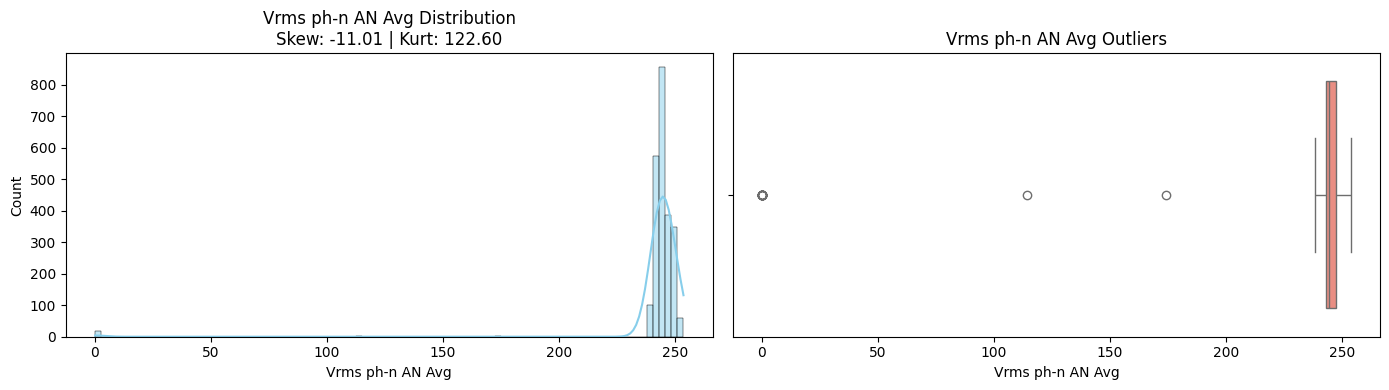

 Feature: Vrms ph-n BN Avg
       Vrms ph-n BN Avg
count       2343.000000
mean         242.855408
std           21.221081
min            0.020000
25%          242.420000
50%          244.000000
75%          247.060000
max          254.780000


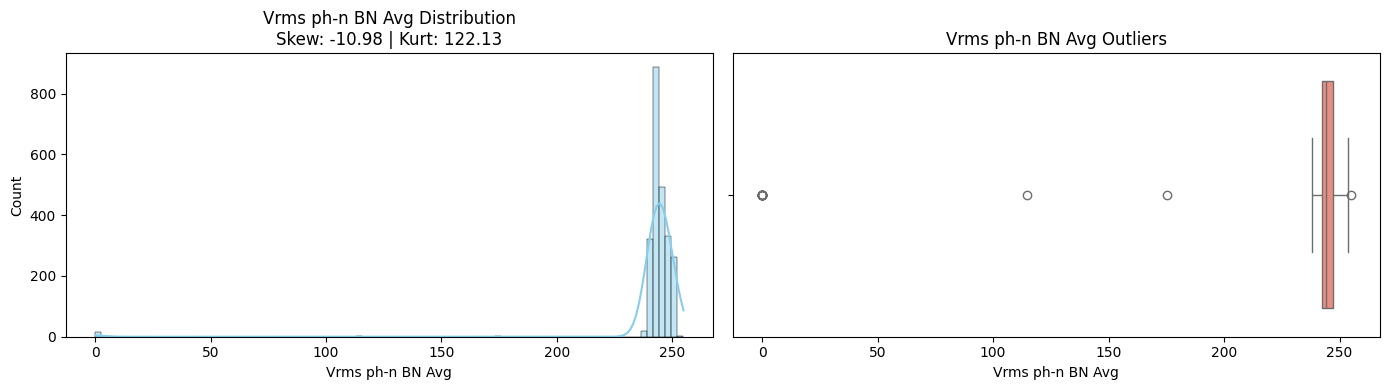

 Feature: Vrms ph-n CN Avg
       Vrms ph-n CN Avg
count       2343.000000
mean         243.190141
std           21.244390
min            0.060000
25%          242.870000
50%          244.500000
75%          247.090000
max          253.160000


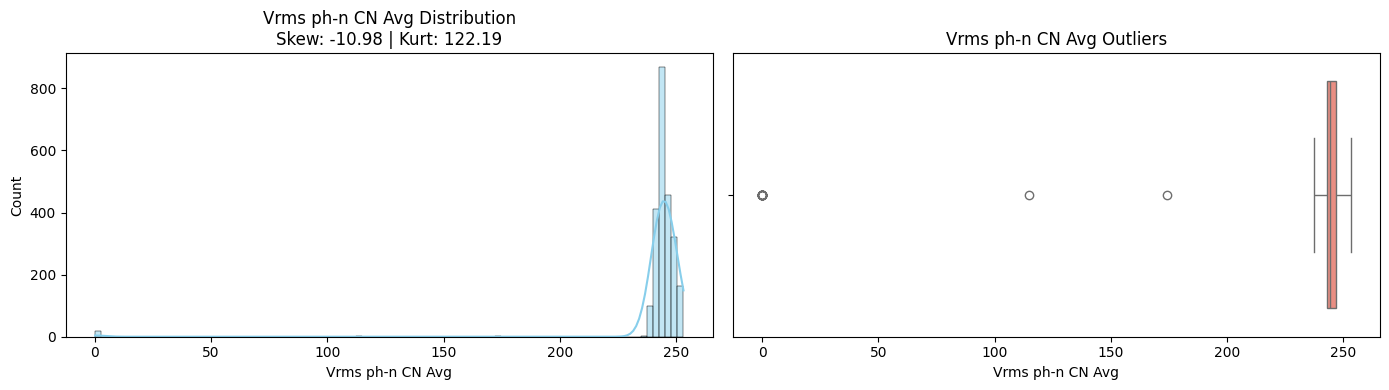

 Feature: Vrms ph-n NG Avg
       Vrms ph-n NG Avg
count       2343.000000
mean           0.641682
std            0.107971
min            0.120000
25%            0.560000
50%            0.640000
75%            0.720000
max            1.040000


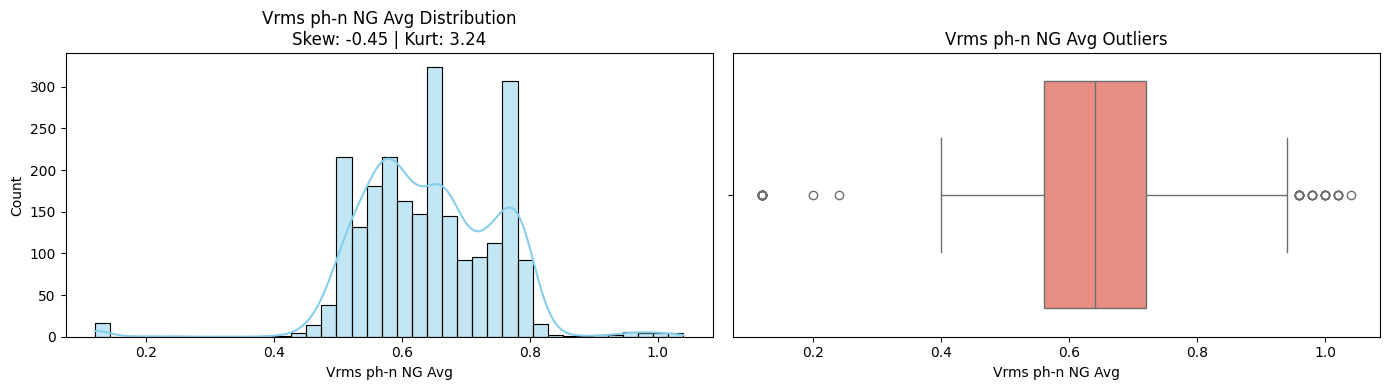

 Feature: Current A Avg
       Current A Avg
count    2343.000000
mean      738.984336
std       176.188660
min         0.100000
25%       665.000000
50%       756.800000
75%       840.300000
max      6276.700000


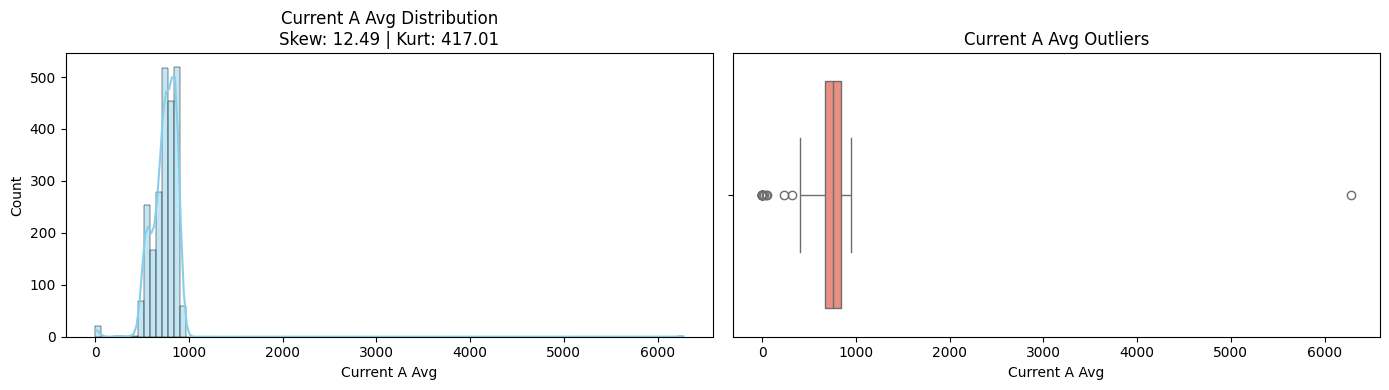

 Feature: Current B Avg
       Current B Avg
count    2343.000000
mean      680.937345
std       239.494361
min         0.100000
25%       593.700000
50%       699.300000
75%       777.550000
max      6276.700000


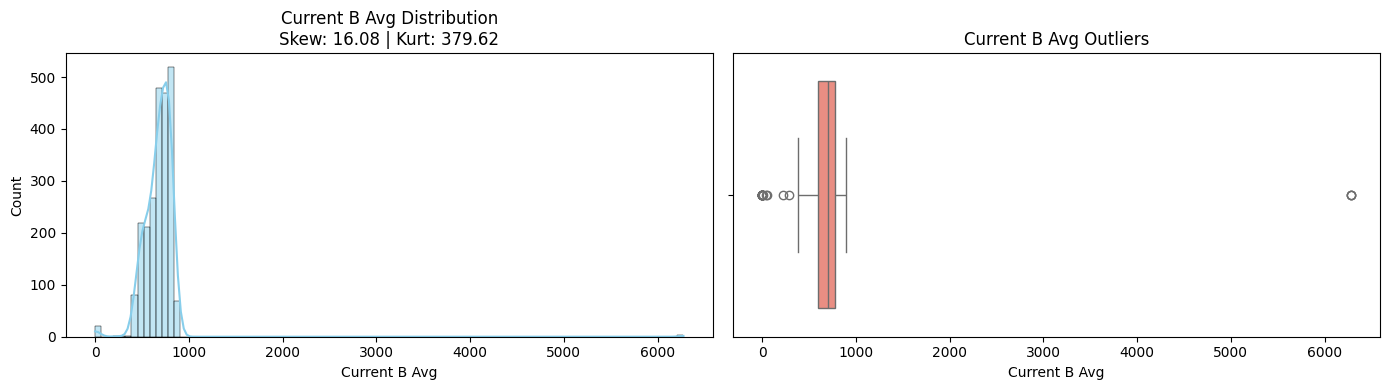

 Feature: Current C Avg
       Current C Avg
count    2343.000000
mean      623.053521
std       130.347417
min         0.100000
25%       545.350000
50%       647.400000
75%       729.700000
max       835.300000


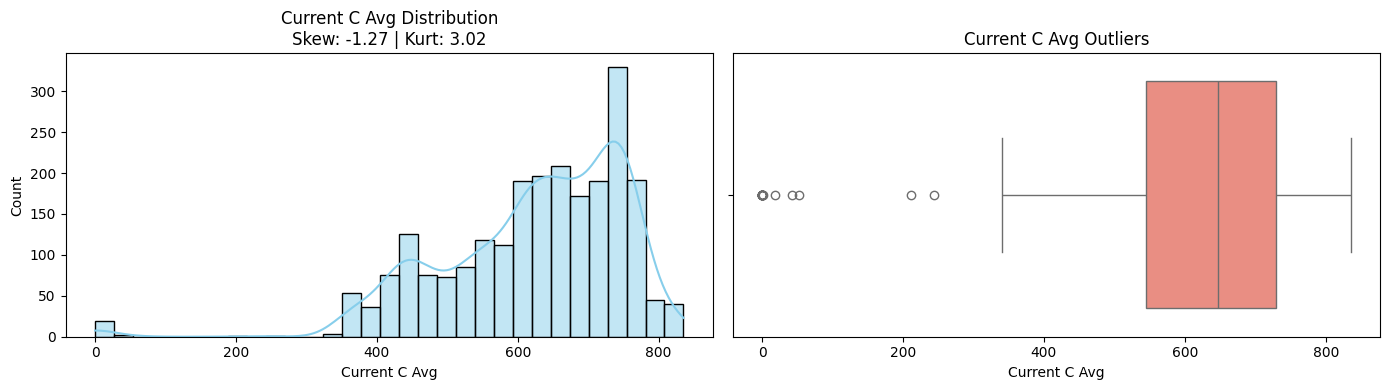

 Feature: Current Phi AN Avg
       Current Phi AN Avg
count         2343.000000
mean           -69.715023
std            116.917071
min           -359.560000
25%            -94.140000
50%             -4.980000
75%             -2.600000
max            655.340000


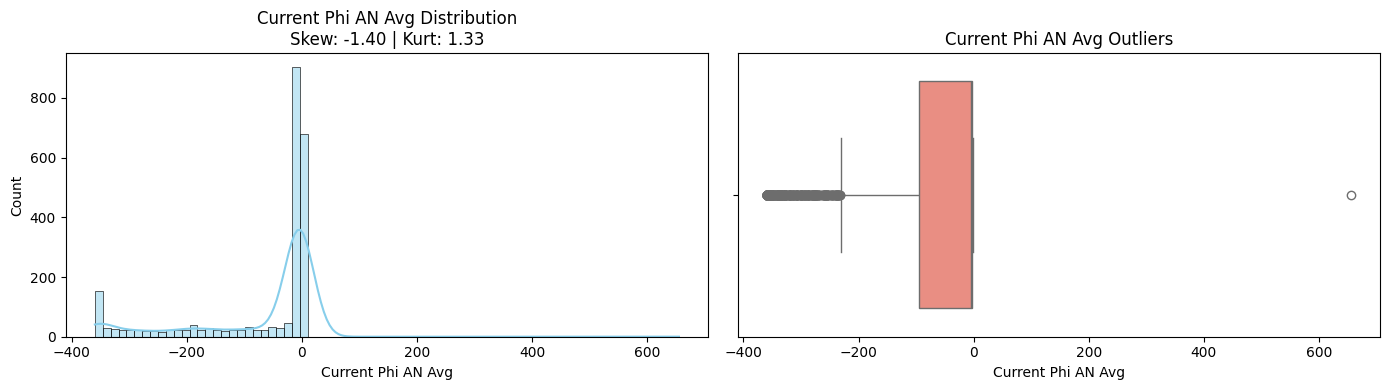

 Feature: Current Phi BN Avg
       Current Phi BN Avg
count         2343.000000
mean          -129.926359
std             28.602276
min           -200.200000
25%           -132.160000
50%           -130.180000
75%           -128.820000
max            655.340000


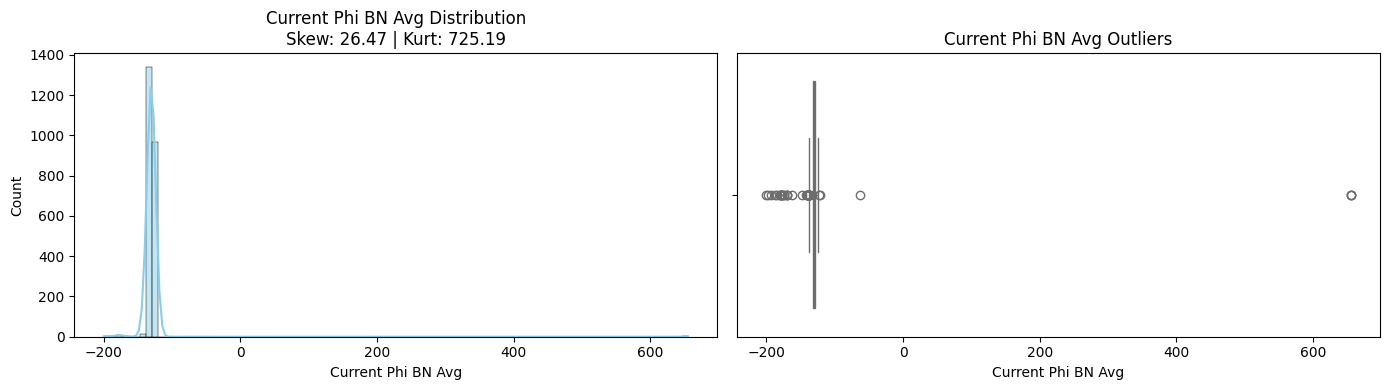

 Feature: Current Phi CN Avg
       Current Phi CN Avg
count         2343.000000
mean          -242.593419
std              6.509653
min           -258.340000
25%           -245.440000
50%           -242.860000
75%           -240.920000
max           -168.580000


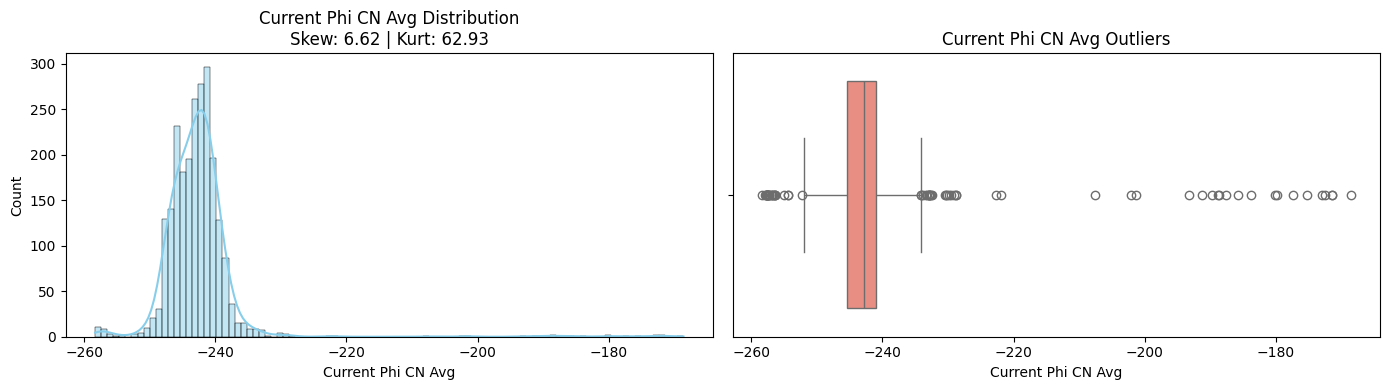

 Feature: Active Power Total Avg
       Active Power Total Avg
count            2.343000e+03
mean             4.986844e+05
std              2.063643e+05
min              0.000000e+00
25%              4.341750e+05
50%              5.091000e+05
75%              5.677500e+05
max              4.915050e+06


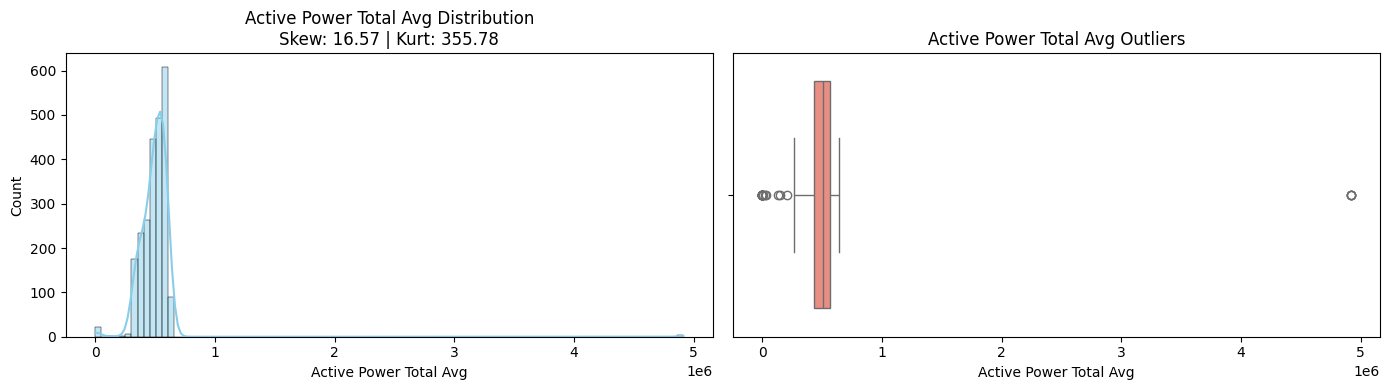

 Feature: Apparent Power Total Avg
       Apparent Power Total Avg
count              2.343000e+03
mean               5.071369e+05
std                2.070221e+05
min                0.000000e+00
25%                4.407000e+05
50%                5.178000e+05
75%                5.775000e+05
max                4.915050e+06


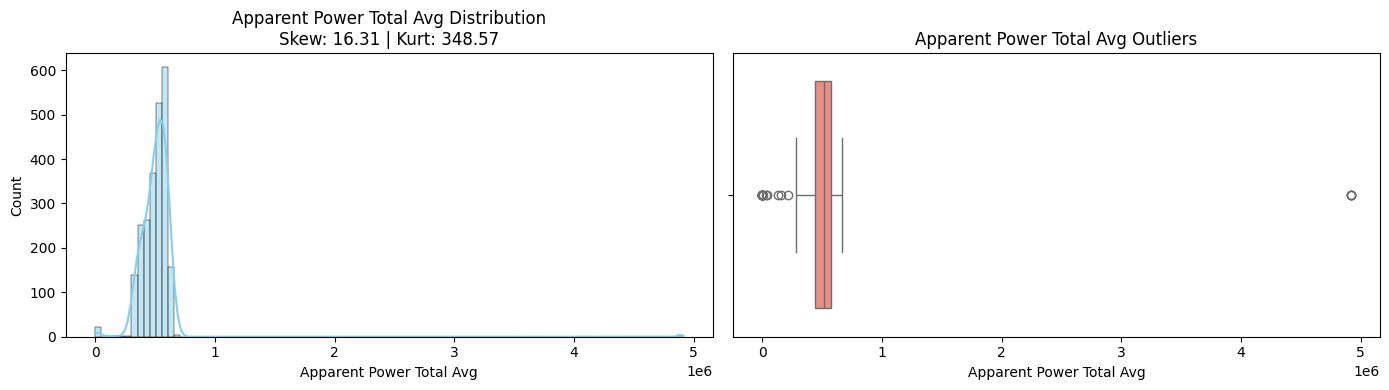

 Feature: Reactive Power Total Avg
       Reactive Power Total Avg
count              2.343000e+03
mean               5.431069e+04
std                2.025362e+05
min               -4.605000e+04
25%                2.775000e+04
50%                4.245000e+04
75%                6.322500e+04
max                4.915050e+06


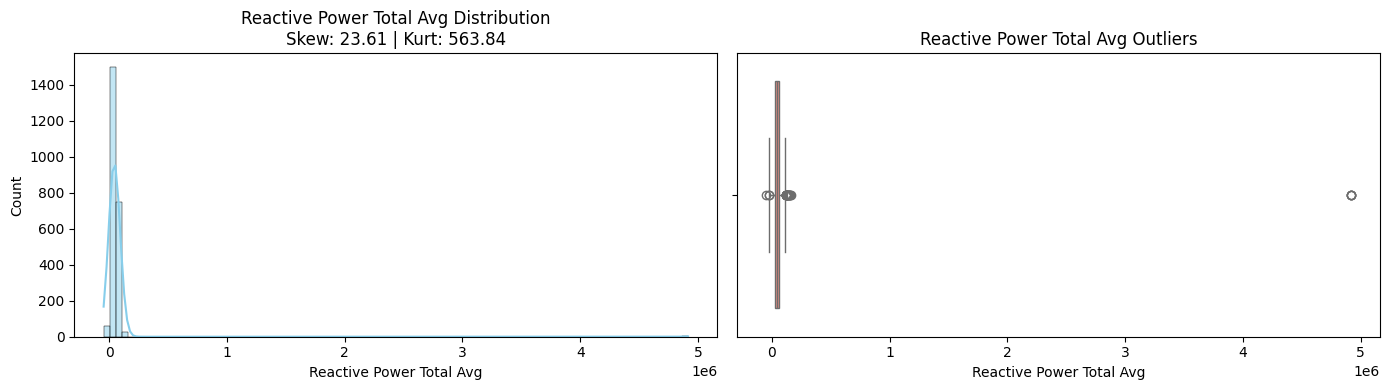

 Feature: Cos Phi AN Avg
       Cos Phi AN Avg
count     2343.000000
mean         1.130226
std          6.749498
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.670000


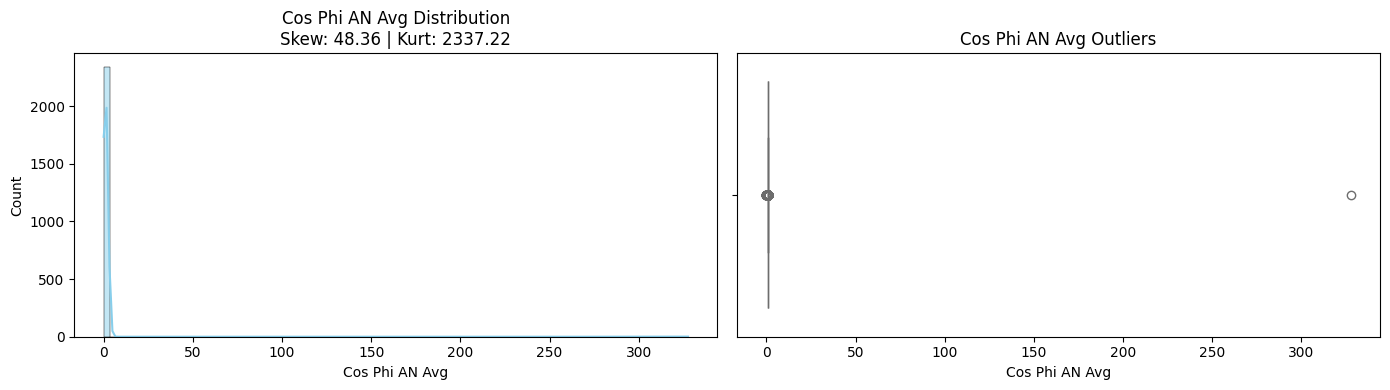

 Feature: Cos Phi BN Avg
       Cos Phi BN Avg
count     2343.000000
mean         1.392885
std         11.685405
min          0.000000
25%          0.980000
50%          0.980000
75%          0.990000
max        327.670000


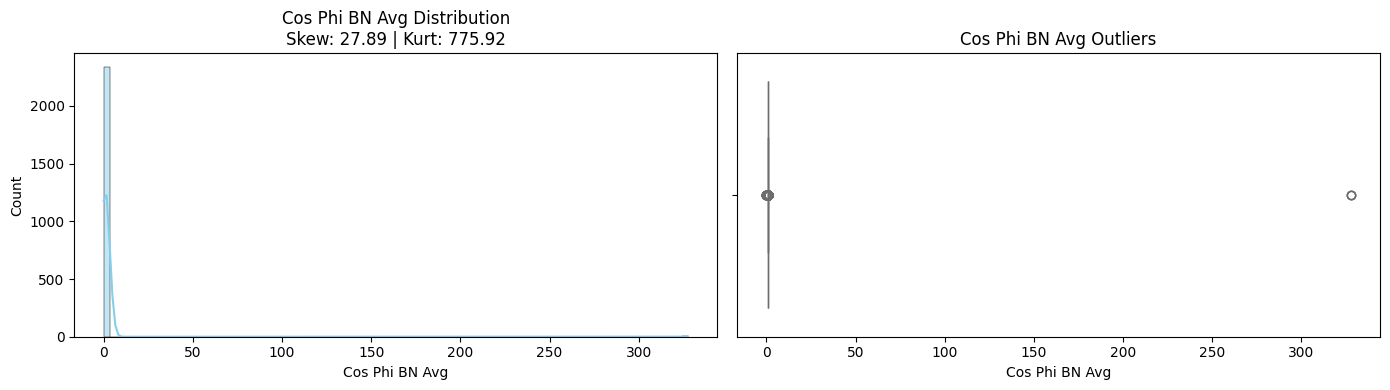

 Feature: Cos Phi CN Avg
       Cos Phi CN Avg
count     2343.000000
mean         0.989351
std          0.086204
min          0.000000
25%          0.990000
50%          1.000000
75%          1.000000
max          1.000000


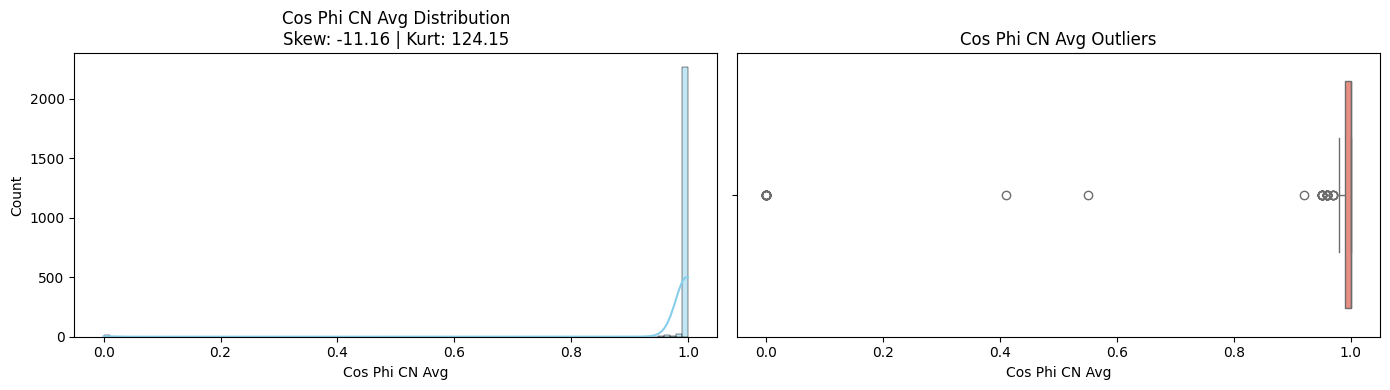

 Feature: Cos Phi Total Avg
       Cos Phi Total Avg
count        2343.000000
mean            1.545262
std            13.489638
min             0.000000
25%             0.990000
50%             1.000000
75%             1.000000
max           327.670000


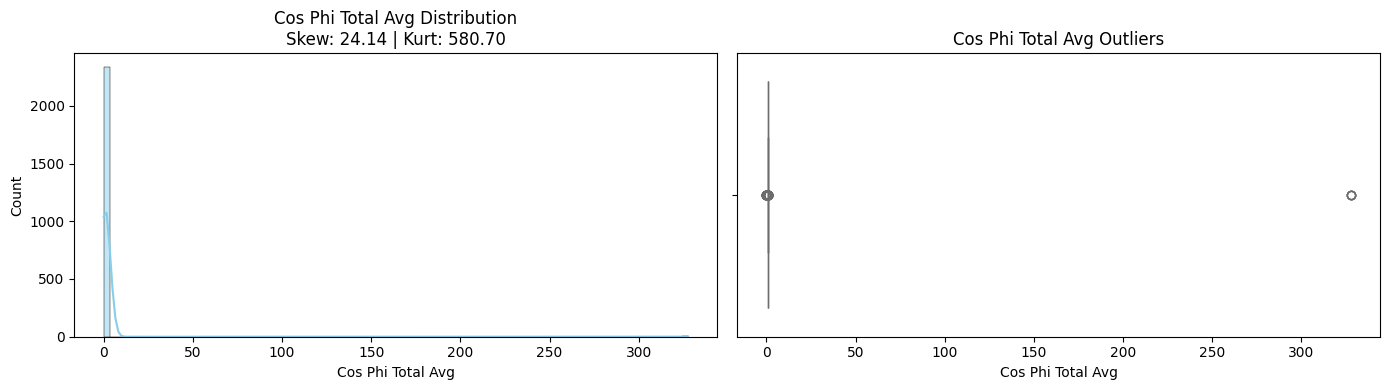

In [30]:
univariate_report(df_raw)

The hight skewness in the datset tells about the Transint(Spikes) that aoccured and recorded in the dataset. then the kurtosistells about the fat tails of the data



| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`volatile acidity`**           | Often slightly right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |
